In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [73]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 

<ipython-input-87-ebd1e7218343>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


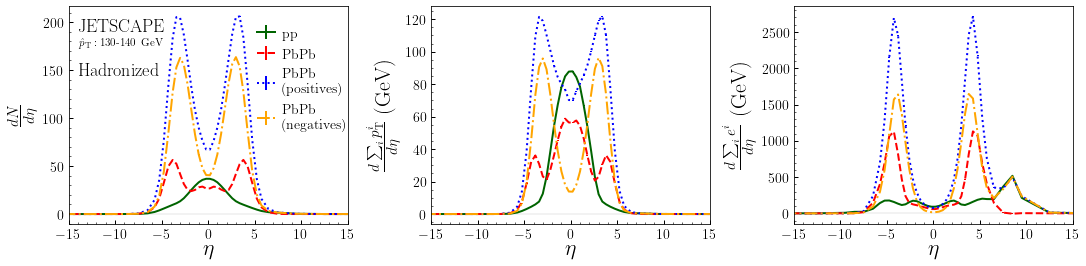

In [87]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file3 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Pos/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file4 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/Neg/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    x4 = data4[:xlen,0]
    y4 = -data4[:xlen,3]
    y4err = data4[:xlen,4]
    x4step = np.append(data4[:xlen,1],data4[xlen-1,2])
    y4step = -np.append(data4[:xlen,3],data4[xlen-1,3])
    
    axs[i].errorbar( x1, y1, yerr=y1err, color='darkgreen', linewidth=2, label='pp', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='red', linewidth=2, label='PbPb', linestyle = 'dashed' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='blue', linewidth=2, label='PbPb\n(positives)', linestyle = 'dotted' )
    axs[i].errorbar( x4, y4, yerr=y4err, color='orange', linewidth=2, label='PbPb\n(negatives)', linestyle = 'dashdot' )

# ##########################################################################################################
    

ax1.text(-14, 190, r'JETSCAPE', fontsize = 18, ha = 'left')
ax1.text(-14, 175, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 145, r'Hadronized', fontsize = 18, ha = 'left')

# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



ax1.legend(bbox_to_anchor=(1.07, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')
# # ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
# # ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_run_qhat.pdf")

<ipython-input-75-75520f55d73b>:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


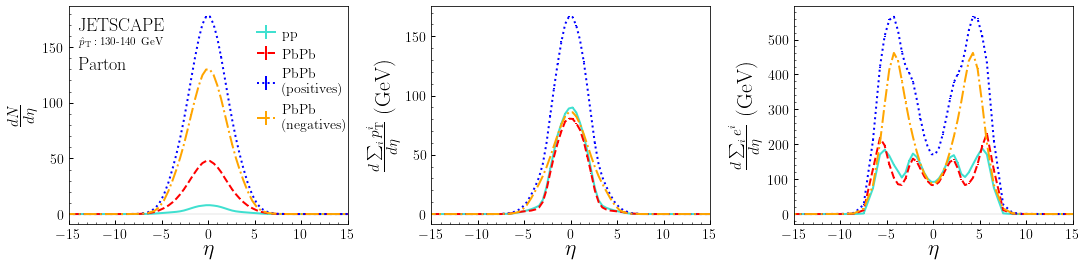

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file3 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Pos/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file4 = dir +'MATTER_LBT_RunningAlphaS_Q2qhat/5020_PbPb_0-5_0.30_2.0_1/PP_Neg/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    x4 = data4[:xlen,0]
    y4 = -data4[:xlen,3]
    y4err = data4[:xlen,4]
    x4step = np.append(data4[:xlen,1],data4[xlen-1,2])
    y4step = -np.append(data4[:xlen,3],data4[xlen-1,3])
    
    axs[i].errorbar( x1, y1, yerr=y1err, color='turquoise', linewidth=2, label='pp', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='red', linewidth=2, label='PbPb', linestyle = 'dashed' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='blue', linewidth=2, label='PbPb\n(positives)', linestyle = 'dotted' )
    axs[i].errorbar( x4, y4, yerr=y4err, color='orange', linewidth=2, label='PbPb\n(negatives)', linestyle = 'dashdot' )

# ##########################################################################################################
    

#ax1.text(0.04, 0.8, 'Parton, fontsize = 13, ha = 'left')
# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')


ax1.text(-14, 165, r'JETSCAPE', fontsize = 18, ha = 'left')
ax1.text(-14, 152, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 130, r'Parton', fontsize = 18, ha = 'left')
ax1.legend(bbox_to_anchor=(1.07, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=14,edgecolor='none', frameon=True, facecolor='none')


plt.tight_layout()
plt.savefig("eta_dist_run_qhat_parton.pdf")

<ipython-input-78-cdc03c948d24>:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


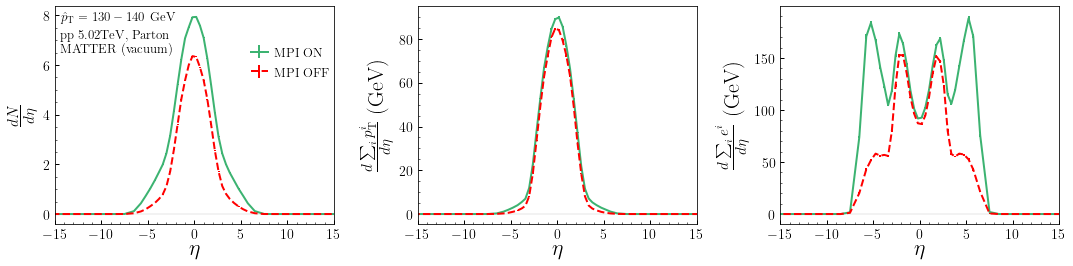

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'


file1 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/5020_PP_Partonic/rap130_140_partonic_mpi_off/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    
    axs[i].errorbar( x1, y1, yerr=y1err, color='mediumseagreen', linewidth=2, label=r'MPI ON', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='red', linewidth=2, label=r'MPI OFF', linestyle = 'dashed' )



# ##########################################################################################################
    
ax1.text(-14.5, 7.8, r'$\hat{p}_{\mathrm{T}}=130-140$ GeV', fontsize = 13, ha = 'left')
ax1.text(-14.5, 6.5, 'pp 5.02TeV, Parton\n MATTER (vacuum)', fontsize = 13, ha = 'left')
# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



ax1.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_mpi.pdf")

<ipython-input-79-54d134287a5e>:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


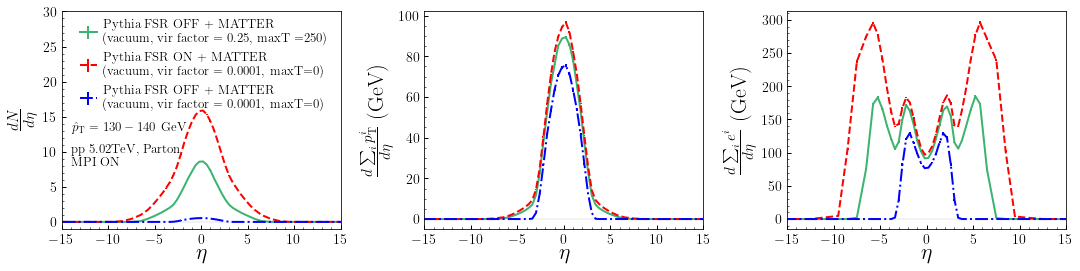

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax1.set_ylim(-1.0,30)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'


#file1 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
#file2 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file1 = dir +'/PP/RapTest/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

file2 = dir +'/PP/RapTestFSRON_maxT0_virFac0p0001/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


file3 = dir +'/PP/RapTestFSR_OFF_maxT0_virFac0p0001/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    # data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    
    axs[i].errorbar( x1, y1, yerr=y1err, color='mediumseagreen', linewidth=2, label='Pythia FSR OFF  + MATTER \n     (vacuum, vir factor = 0.25, maxT =250)', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='red', linewidth=2, label='Pythia FSR ON + MATTER \n(vacuum, vir factor = 0.0001, maxT=0)', linestyle = 'dashed' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='blue', linewidth=2, label='Pythia FSR OFF  + MATTER \n(vacuum, vir factor = 0.0001, maxT=0)', linestyle = 'dashdot' )


# ##########################################################################################################
    
ax1.text(-14, 13, r'$\hat{p}_{\mathrm{T}}=130-140$ GeV', fontsize = 13, ha = 'left')
ax1.text(-14, 8, 'pp 5.02TeV, Parton\n MPI ON', fontsize = 13, ha = 'left')
# ax2.text(0.04, 0.6, 'Sideband subtraction $1.5<|\Delta \eta| <2.5$', fontsize = 13, ha = 'left')



ax1.legend(bbox_to_anchor=(0, 1.05), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper left', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_fsr.pdf")

<ipython-input-82-9d6c6165049e>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


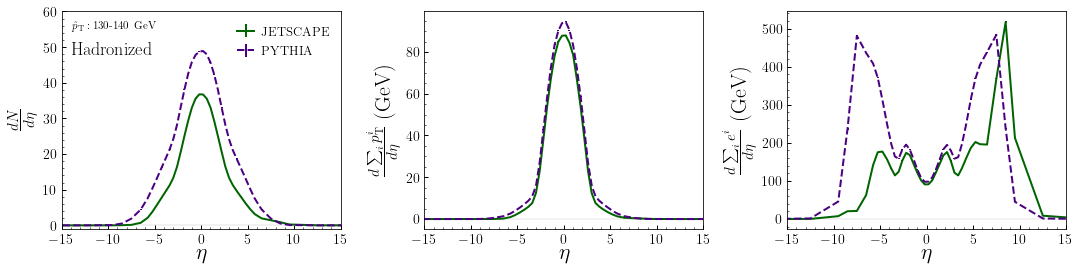

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax1.set_ylim(-1.0,60)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/Pythia/Hadron/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

#file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    #data3 = np.loadtxt(file3.format(val[i]), comments='#')
    # data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])


    
    axs[i].errorbar( x1, y1, yerr=y1err, color='darkgreen', linewidth=2, label='JETSCAPE', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='indigo', linewidth=2, label='PYTHIA', linestyle = 'dashed' )


# ##########################################################################################################
    

ax1.text(-14, 55, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 48, r'Hadronized', fontsize = 18, ha = 'left')



ax1.legend(bbox_to_anchor=(1.02, 1.02), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_hadron_pythia_jetscape.pdf")

<ipython-input-83-ae54908d05b6>:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


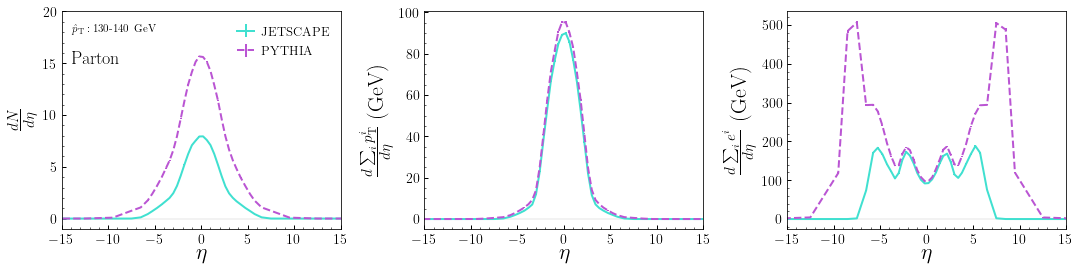

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax1.set_ylim(-1.0,20)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

#file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    #data3 = np.loadtxt(file3.format(val[i]), comments='#')
    # data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])


    
    axs[i].errorbar( x1, y1, yerr=y1err, color='turquoise', linewidth=2, label='JETSCAPE', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='mediumorchid', linewidth=2, label='PYTHIA', linestyle = 'dashed' )


# ##########################################################################################################
    

ax1.text(-14, 18, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 15, r'Parton', fontsize = 18, ha = 'left')



ax1.legend(bbox_to_anchor=(1.02, 1.02), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_parton_pythia_jetscape.pdf")

<ipython-input-84-1642ee8f6960>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


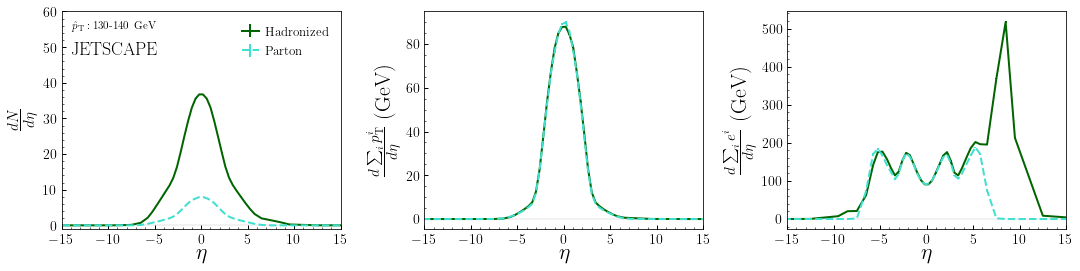

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax1.set_ylim(-1.0,60)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
#file2 = dir +'/PP/Pythia/Hadron/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

#file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    #data3 = np.loadtxt(file3.format(val[i]), comments='#')
    # data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])


    
    axs[i].errorbar( x1, y1, yerr=y1err, color='darkgreen', linewidth=2, label='Hadronized', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='turquoise', linewidth=2, label='Parton', linestyle = 'dashed' )


# ##########################################################################################################
    

ax1.text(-14, 55, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 48, r'JETSCAPE', fontsize = 18, ha = 'left')



ax1.legend(bbox_to_anchor=(1.02, 1.02), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_jetscape_pp.pdf")

<ipython-input-85-6090e30328f8>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


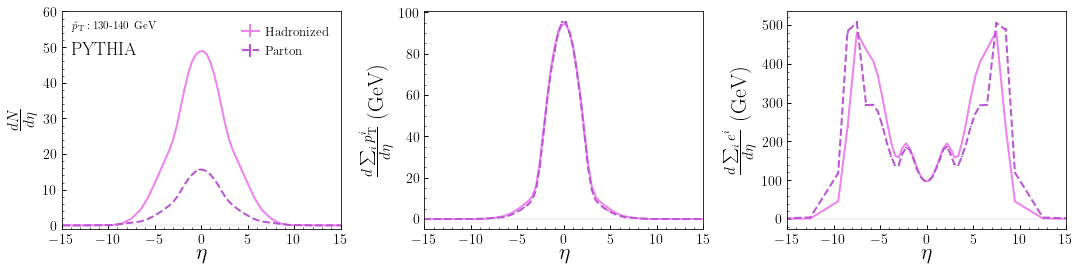

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

ax1.set_ylim(-1.0,60)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
#file1 = dir +'/PP/5020_PP_Colorless/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
#file2 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file1 = dir +'/PP/Pythia/Hadron/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'


val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    #data3 = np.loadtxt(file3.format(val[i]), comments='#')
    # data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])


    
    axs[i].errorbar( x1, y1, yerr=y1err, color='violet', linewidth=2, label='Hadronized', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='mediumorchid', linewidth=2, label='Parton', linestyle = 'dashed' )


# ##########################################################################################################
    

ax1.text(-14, 55, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 48, r'PYTHIA', fontsize = 18, ha = 'left')



ax1.legend(bbox_to_anchor=(1.02, 1.02), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_pythia_pp.pdf")

<ipython-input-101-9cf632863da0>:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


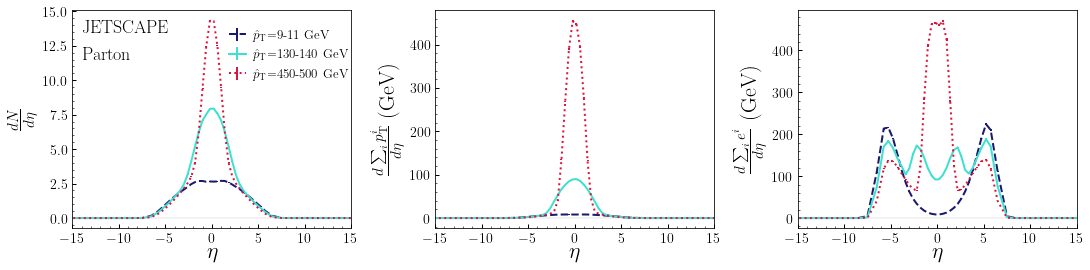

In [101]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/5020_PP_Partonic/rap9_11_partonic/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

file2 = dir +'/PP/5020_PP_Partonic/Full/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

file3 = dir +'/PP/5020_PP_Partonic/rap450_500_partonic/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    
    axs[i].errorbar( x1, y1, yerr=y1err, color='midnightblue', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=9-11 GeV', linestyle = 'dashed' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='turquoise', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=130-140 GeV', linestyle = 'solid' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='crimson', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=450-500 GeV', linestyle = 'dotted' )


# ##########################################################################################################
    


ax1.text(-14, 13.5, r'JETSCAPE', fontsize = 18, ha = 'left')
#ax1.text(-14, 12.5, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 11.5, r'Parton', fontsize = 18, ha = 'left')

ax1.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_pthat.pdf")

<ipython-input-111-5be0ea7c42e1>:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


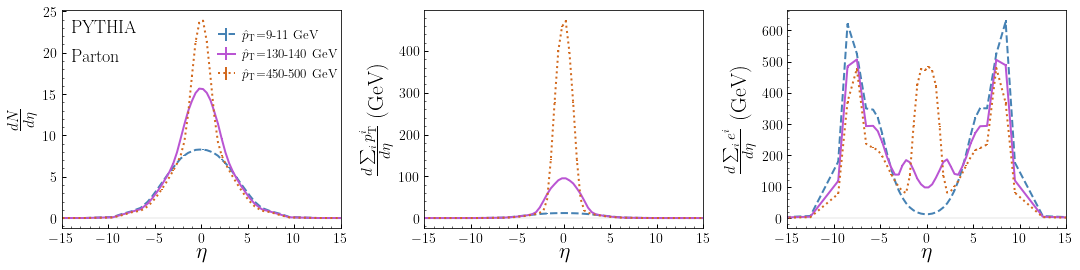

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/Pythia/pthat9_11/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

file3 = dir +'/PP/Pythia/pthat450_500/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'

val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    
    axs[i].errorbar( x1, y1, yerr=y1err, color='steelblue', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=9-11 GeV', linestyle = 'dashed' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='mediumorchid', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=130-140 GeV', linestyle = 'solid' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='chocolate', linewidth=2, label=r'$\hat{p}_{\mathrm{T}}$=450-500 GeV', linestyle = 'dotted' )


# ##########################################################################################################
    


ax1.text(-14, 22.5, r'PYTHIA', fontsize = 18, ha = 'left')
#ax1.text(-14, 12.5, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 19, r'Parton', fontsize = 18, ha = 'left')

ax1.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_pthat_pythia.pdf")

<ipython-input-124-b6dbec45e374>:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


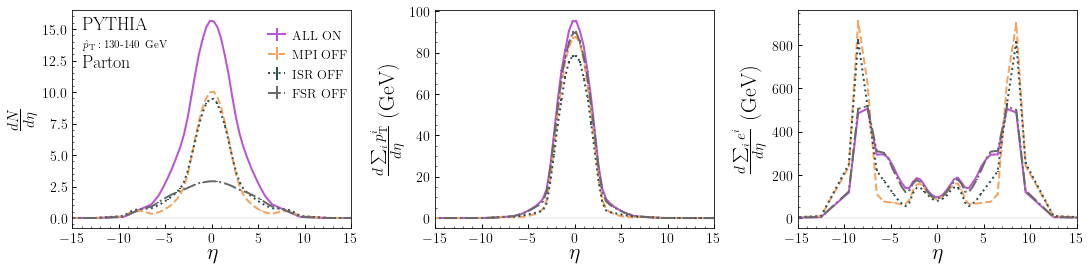

In [124]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharex='col', sharey=False,
                        gridspec_kw={'hspace': 0, 'wspace': 0.3,'width_ratios': (1,1,1)})
ax1, ax2, ax3  = axs

for ax in axs:
    ax.tick_params(labelsize = 14)
    ax.set_xlabel(r'$\eta$', fontsize=22, labelpad=-2)
    ax.tick_params(width = 1, length = 4, pad=5)
    #ax.label_outer()
    ax.axhline(0, color = "black", linewidth=0.2, alpha=0.5)
    ax.set_xlim(-15,15)

# ax2.set_xticks([0,0.2,0.4,0.6,0.8, 1.0])

# ax2.set_xlim(0,1.0)

# ax1.set_ylim(0.5,1500)
ax1.set_ylabel(r'$\frac{dN}{d\eta}$', fontsize=22, labelpad=6)
ax2.set_ylabel(r'$\frac{d\sum_i p^i_{\mathrm{T}}}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
ax3.set_ylabel(r'$\frac{d\sum_i e^i}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
#ax4.set_ylabel(r'$\frac{d\sum_i p^i_z}{d\eta}$ (GeV)', fontsize=22, labelpad=6)
# ax2.set_ylabel(r'Ratio to Exp. Data', fontsize=13, labelpad=14)

# ax2.set_ylim(0.5,1.5)

# ax1.set_yscale("log")

# ax1.text(0.975, 800, r'$pp,\,5.02$ TeV', fontsize = 18, ha = 'right')
# # ax2.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')
# # ax3.text(0.975, 800, r'PbPb ($0$-$10\%$), $5.02$ TeV', fontsize = 18, ha = 'right')

# ##########################################################################################################

dir = '/Users/yasukitachibana/GoogleDrive/Codes/JetAnalysis/RapDist/'
file1 = dir +'/PP/Pythia/ALL_ON/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file2 = dir +'/PP/Pythia/MPI_OFF/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file3 = dir +'/PP/Pythia/ISR_OFF/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'
file4 = dir +'/PP/Pythia/FSR_OFF/rapiditydist_hist_total_RapDist_Eta_jetr0.4_ptj0-3000_rapj0.0-1.6_pt0.0-10000.0_rap0.0-10000.0_{}.txt'



val = ['n','pt','e','pz']


for i in range(3):


    data1 = np.loadtxt(file1.format(val[i]), comments='#')
    data2 = np.loadtxt(file2.format(val[i]), comments='#')
    data3 = np.loadtxt(file3.format(val[i]), comments='#')
    data4 = np.loadtxt(file4.format(val[i]), comments='#')


    xlen = len(data1[:,0])

    x1 = data1[:xlen,0]
    y1 = data1[:xlen,3]
    y1err = data1[:xlen,4]
    x1step = np.append(data1[:xlen,1],data1[xlen-1,2])
    y1step = np.append(data1[:xlen,3],data1[xlen-1,3])

    x2 = data2[:xlen,0]
    y2 = data2[:xlen,3]
    y2err = data2[:xlen,4]
    x2step = np.append(data2[:xlen,1],data2[xlen-1,2])
    y2step = np.append(data2[:xlen,3],data2[xlen-1,3])

    x3 = data3[:xlen,0]
    y3 = data3[:xlen,3]
    y3err = data3[:xlen,4]
    x3step = np.append(data3[:xlen,1],data3[xlen-1,2])
    y3step = np.append(data3[:xlen,3],data3[xlen-1,3])

    x4 = data4[:xlen,0]
    y4 = data4[:xlen,3]
    y4err = data4[:xlen,4]
    x4step = np.append(data4[:xlen,1],data4[xlen-1,2])
    y4step = np.append(data4[:xlen,3],data4[xlen-1,3])

    
    axs[i].errorbar( x1, y1, yerr=y1err, color='mediumorchid', linewidth=2, label=r'ALL ON', linestyle = 'solid' )
    axs[i].errorbar( x2, y2, yerr=y2err, color='sandybrown', linewidth=2, label=r'MPI OFF', linestyle = 'dashed' )
    axs[i].errorbar( x3, y3, yerr=y3err, color='darkslategray', linewidth=2, label=r'ISR OFF', linestyle = 'dotted' )
    axs[i].errorbar( x4, y4, yerr=y4err, color='dimgray', linewidth=2, label=r'FSR OFF', linestyle = 'dashdot' )

# ##########################################################################################################
    


ax1.text(-14, 15, r'PYTHIA', fontsize = 18, ha = 'left')
ax1.text(-14, 13.5, r'$\hat{p}_{\mathrm{T}}: 130\mbox{-}140$ GeV', fontsize = 11, ha = 'left')
ax1.text(-14, 12, r'Parton', fontsize = 18, ha = 'left')

ax1.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=13,edgecolor='none', frameon=True, facecolor='none')
#ax2.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')
#ax3.legend(bbox_to_anchor=(1.05, 0.9), borderaxespad=1,handlelength=1.3, handletextpad=0.5,loc='upper right', fontsize=12,edgecolor='none', frameon=True, facecolor='none')

plt.tight_layout()
plt.savefig("eta_dist_mpi_isr_fsr.pdf")